In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import pandas as pd
import numpy as np

# Introduction to SVM

In this practice we are going to apply SVM to synthetic data to understand its operation and the impact of its parameters.

## Data Generation

We generate some data belonging to two classes linearly separable.

In [3]:
n = 1500          # number of data points
p = 2             # dimension
sigma = 1         # variance of the distribution
meanpos = 0       # centre of the distribution of positive examples
meanneg = 3       # centre of the distribution of negative examples
npos = round(n/2) # number of positive examples
nneg = n-npos     # number of negative examples

# Generate the positive and negative examples
Xpositive = np.random.normal(meanpos,sigma,(npos,p))
Xnegative = np.random.normal(meanneg,sigma,(npos,p))

x = np.vstack((Xpositive,Xnegative))

# Generate the labels
y = np.vstack((np.array([1]*npos).reshape(-1,1), np.array([0]*nneg).reshape(-1,1)))

## Data Visualization

Let's visualize the data

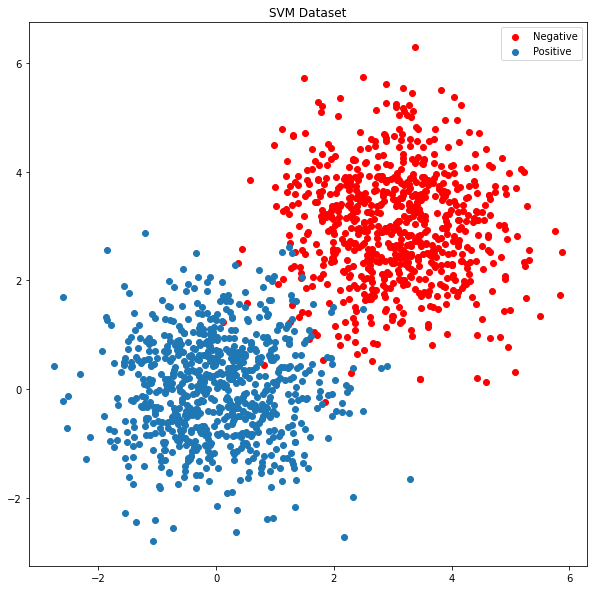

In [4]:
plt.figure(figsize=(10,10))
plt.title("SVM Dataset")
plt.scatter(Xnegative[:,0],Xnegative[:,1],color="red", label="Negative")
plt.scatter(Xpositive[:,0],Xpositive[:,1],label="Positive")
plt.legend();

## Train Test Splitting

For the later evaluation we split the dataset (80% for training and 20% for test)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## SVM

We will make use of the `SVM` package (https://scikit-learn.org/stable/modules/svm.html) in the `sklearn` to train a SVM classifier on the generated data. 

There are two important parameters:
 - C that controls the penalty of wrongly categorize datapoints depending on their distance from the separating hyperplane. As we explained in class, selecting a proper C vaule is crucial to the generalizability of the SVM. In this example code, it´s set to 1.

 - The other parameter is the kernel applied. For this example, we use a linear kernel.


In [6]:
from sklearn import svm

C = 1

clf = svm.SVC(C,kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

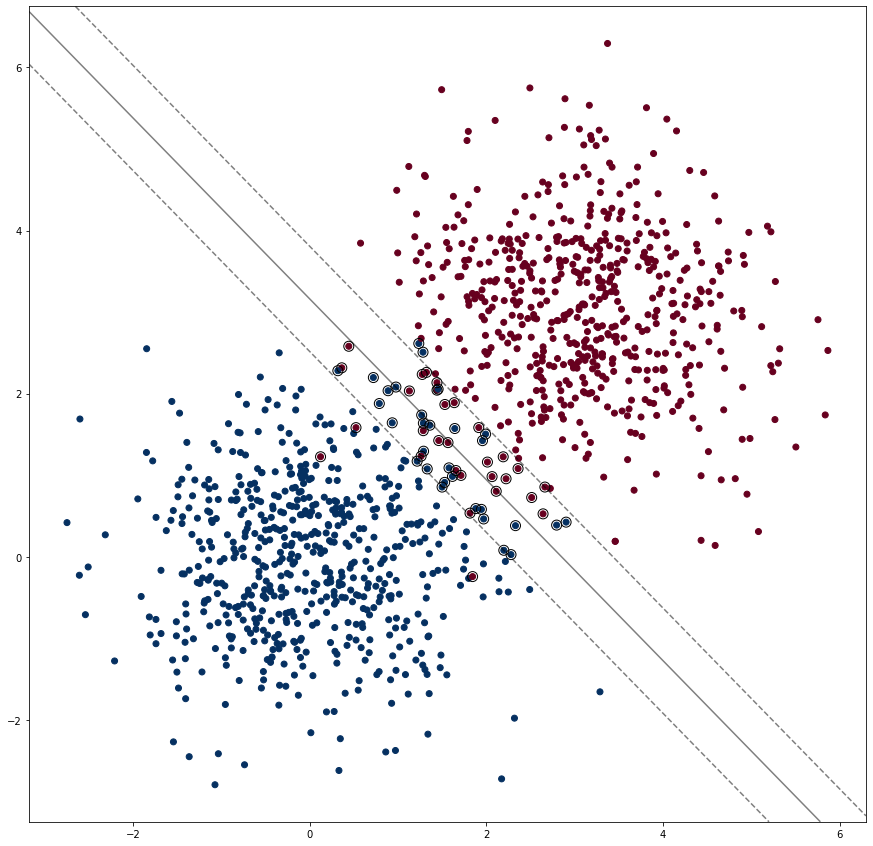

In [7]:
def plot_svm_decision(X_train, y_train, clf):

    plt.figure(figsize=(15,15))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:,0], cmap=plt.cm.RdBu)
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()
    
    
plot_svm_decision(X_train, y_train, clf)

Naive Bayes Accuracy = 0.9766666666666667


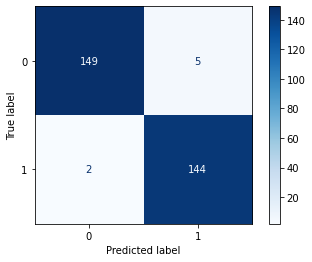

In [8]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

# Predict labels on test
predictions = clf.predict(X_test)

print("Naive Bayes Accuracy = {}".format(accuracy_score(clf.predict(X_test), y_test)))
plot_confusion_matrix(clf, X_test, y_test, [0,1], cmap=plt.cm.Blues);

An almost perfect classifier as we expected.

# Exercise 1: RBF Kernel

Based on the previous code, test a non-linear kernel and plot the decision boundary.

¿How does it affect to the classification boundary?

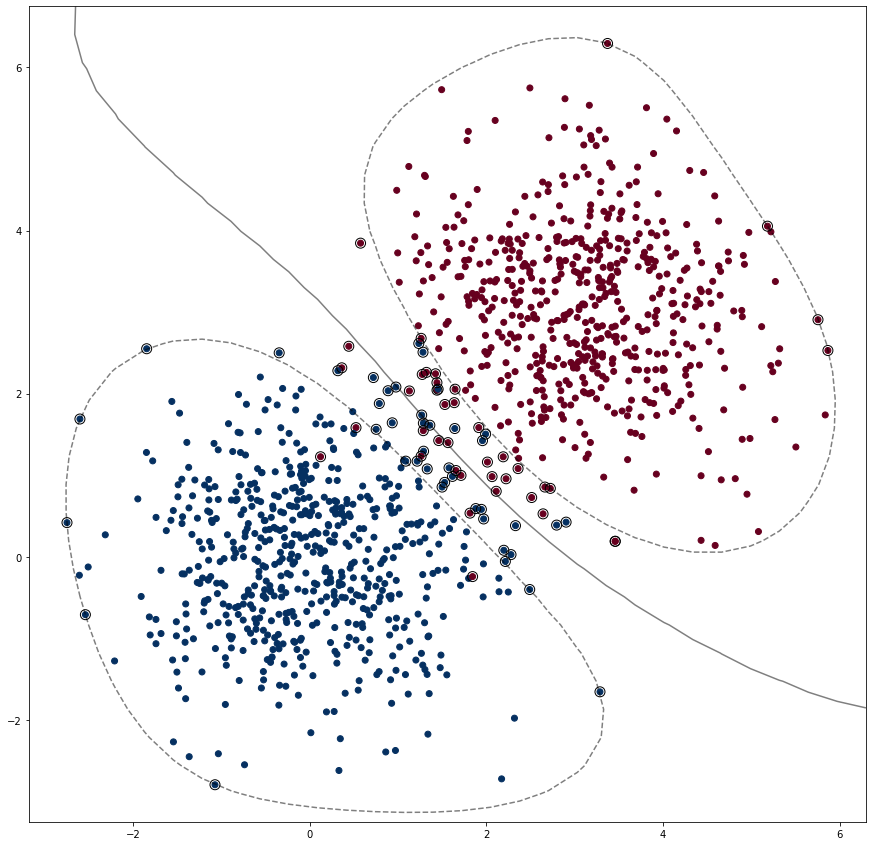

In [9]:
C = 1

clf = svm.SVC(C, kernel='rbf')
clf.fit(X_train, y_train)

plot_svm_decision(X_train, y_train, clf)

As seen in the figure, the RBF kernel introduces non-linearities in the classification boundary. It allows the boundary to fit better the data, thus improving the performance of the classifier for complex classification tasks

Naive Bayes Accuracy = 0.9766666666666667


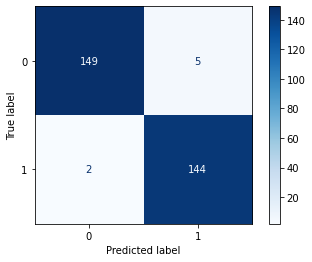

In [10]:
# Predict labels on test
predictions = clf.predict(X_test)

print("Naive Bayes Accuracy = {}".format(accuracy_score(clf.predict(X_test), y_test)))
plot_confusion_matrix(clf, X_test, y_test, [0,1], cmap=plt.cm.Blues);


# Exercise #2: Regularization

Play with different values of `C` and explain how they affect to the decision boundary.

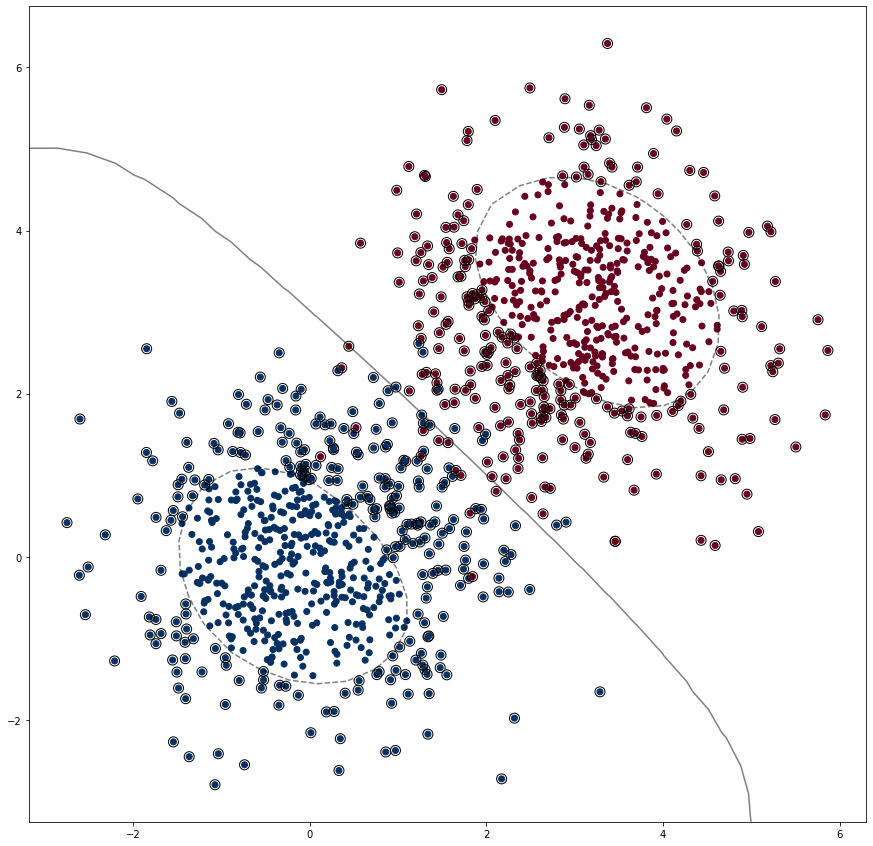

In [11]:
C = 0.01

clf = svm.SVC(C, kernel='rbf')
clf.fit(X_train, y_train)

plot_svm_decision(X_train, y_train, clf)

A smaller C value will cause the optimizer to regularize more (remember that C applies to the Training Error in SVM, so a smaller value means to focus less on the Training Error and, consequently, to regularize more).

By doing that, the model does not care so much at creating a decision boundary that learns pretty well the classes (you can see how it barely adapts to the shape of the class), but on creating a generic solution (it's basically learning the average of the class datapoints).


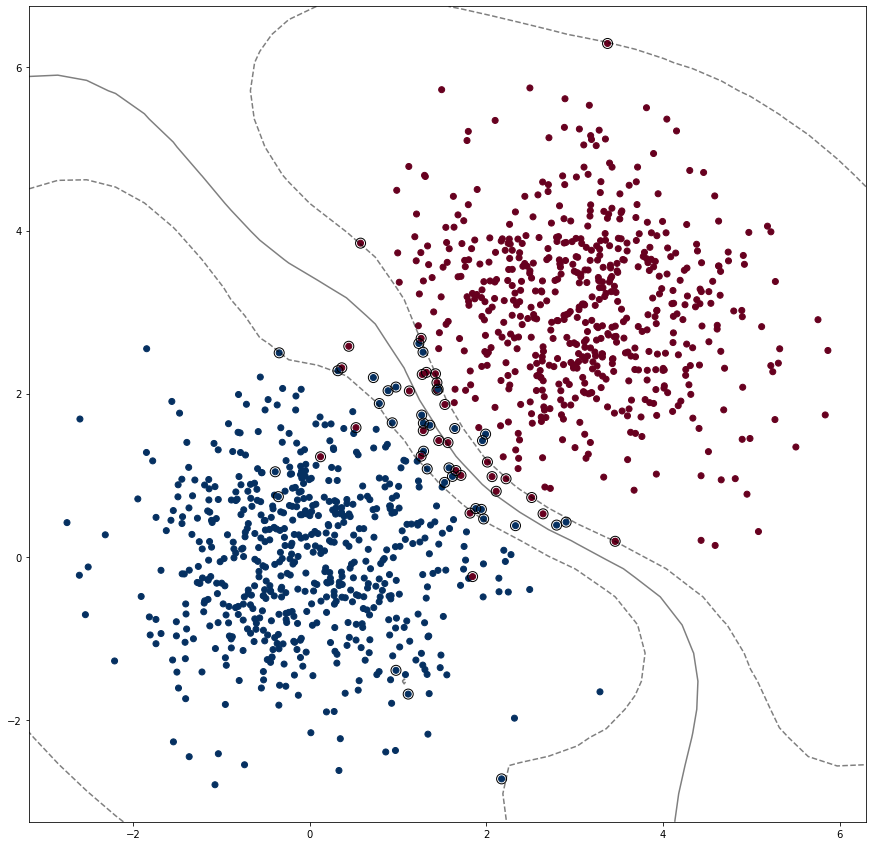

In [12]:
C = 100

clf = svm.SVC(C, kernel='rbf')
clf.fit(X_train, y_train)

plot_svm_decision(X_train, y_train, clf)

In contrast a larger value of C focuses more on learnign the shape of the classes trying to missclassify less datapoints.

# Exercise #3: Polynomial Kernel

We have played with linearly separable data. Let's see now how SVM behaves for non-linearly separable data. To that end we load the "spiral data", where each color belongs to one class.

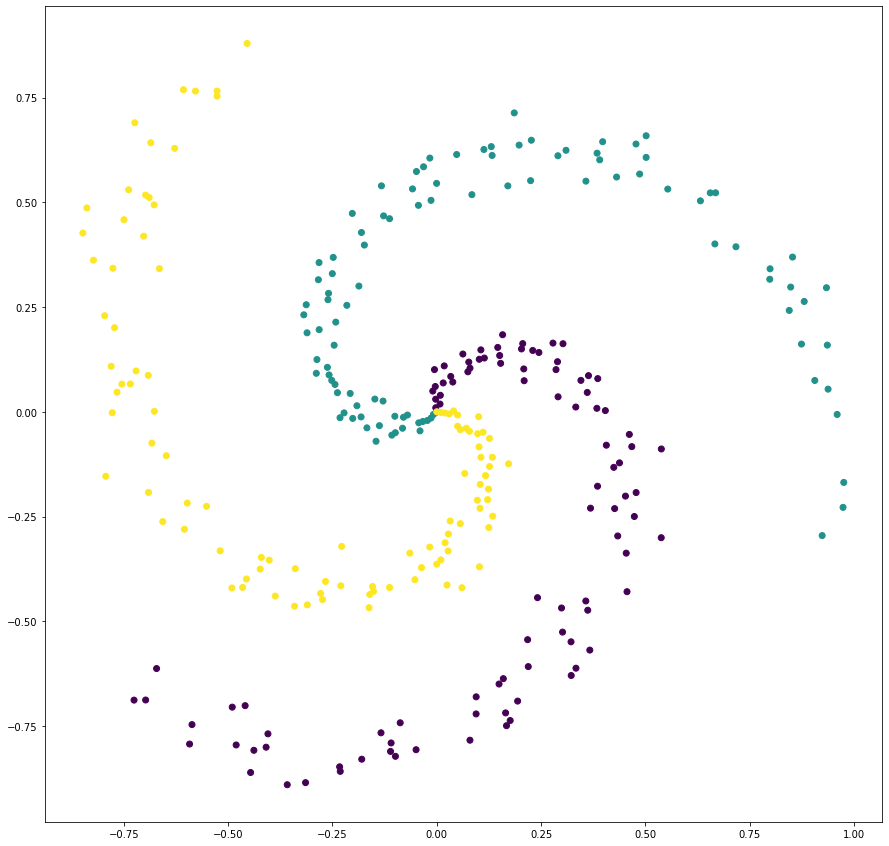

In [13]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

plt.figure(figsize=(15,15))
plt.scatter(train.X, train.Y, c=train.Label);

The following code train a SVM model with a polynomial kernel and plot the classification boundary


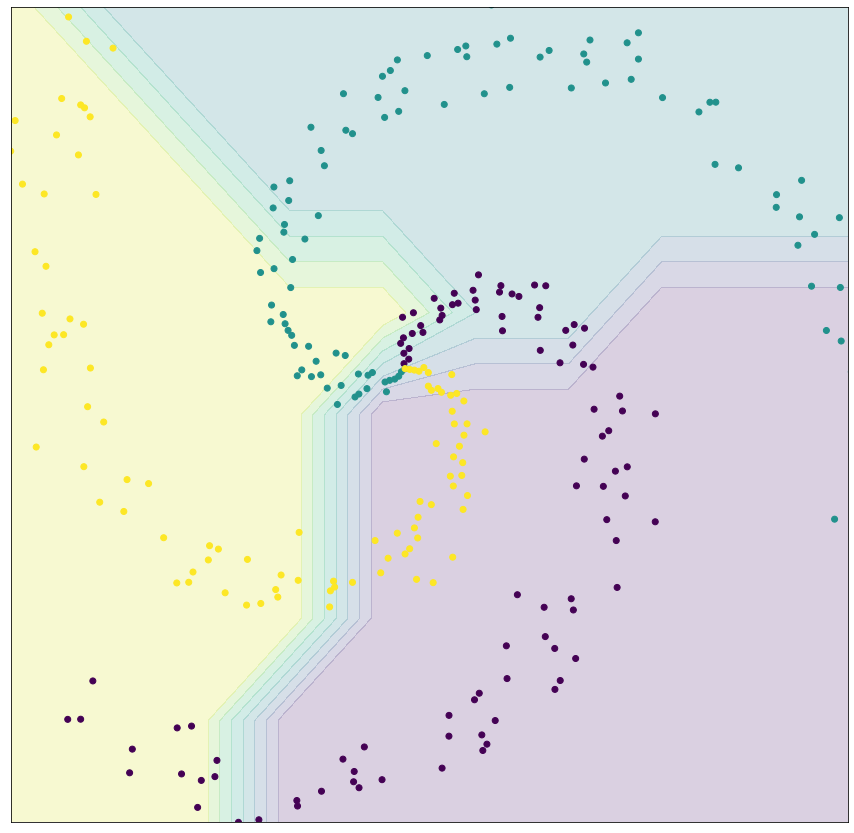

In [14]:
degree = 1

def svm_polynomial_kernel(degree=degree):

    clf = svm.SVC(degree=degree, kernel='poly')
    clf.fit(train.iloc[:,1:3], train.Label)

    plt.figure(figsize=(15,15))

    # create a mesh to plot in
    x_min, x_max = train.iloc[:, 1].min(), train.iloc[:, 1].max()
    y_min, y_max = train.iloc[:, 2].min(), train.iloc[:, 2].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)

    # Plot also the training points
    plt.scatter(train.iloc[:, 1], train.iloc[:, 2], c=train.Label)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()
    
svm_polynomial_kernel(degree)


As you can see, the Linear Kernel is not able to classify the non-linearities in the data.



Try different degrees for the polynomial kernel using the `svm_polynomial_kernel` function. Which one would you select?

Polynomial Kernel with degree = 1


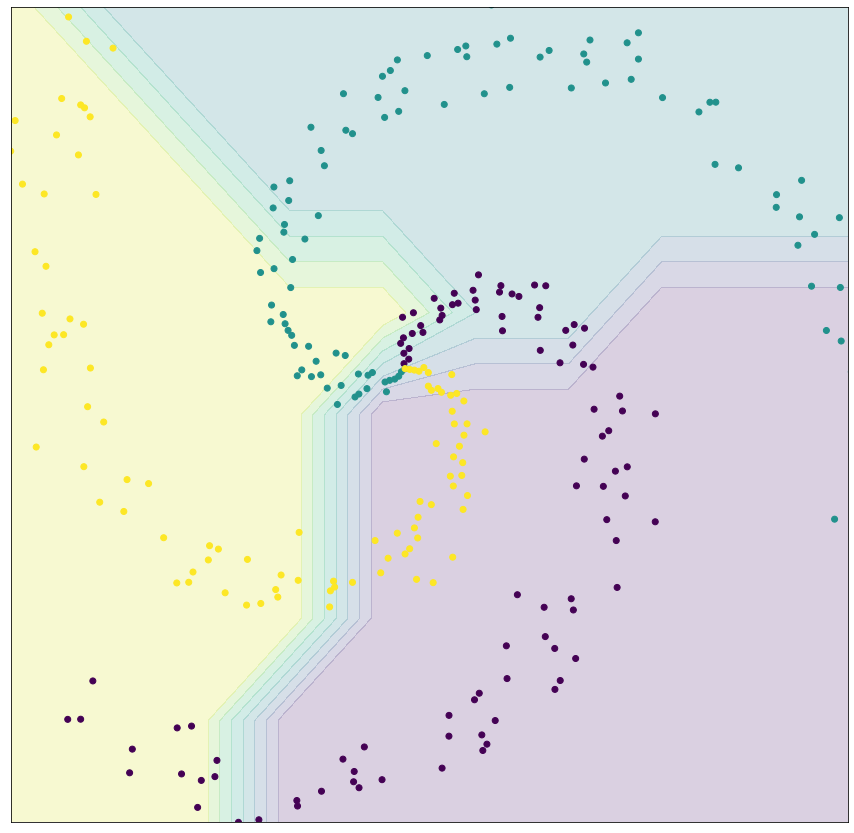

Polynomial Kernel with degree = 2


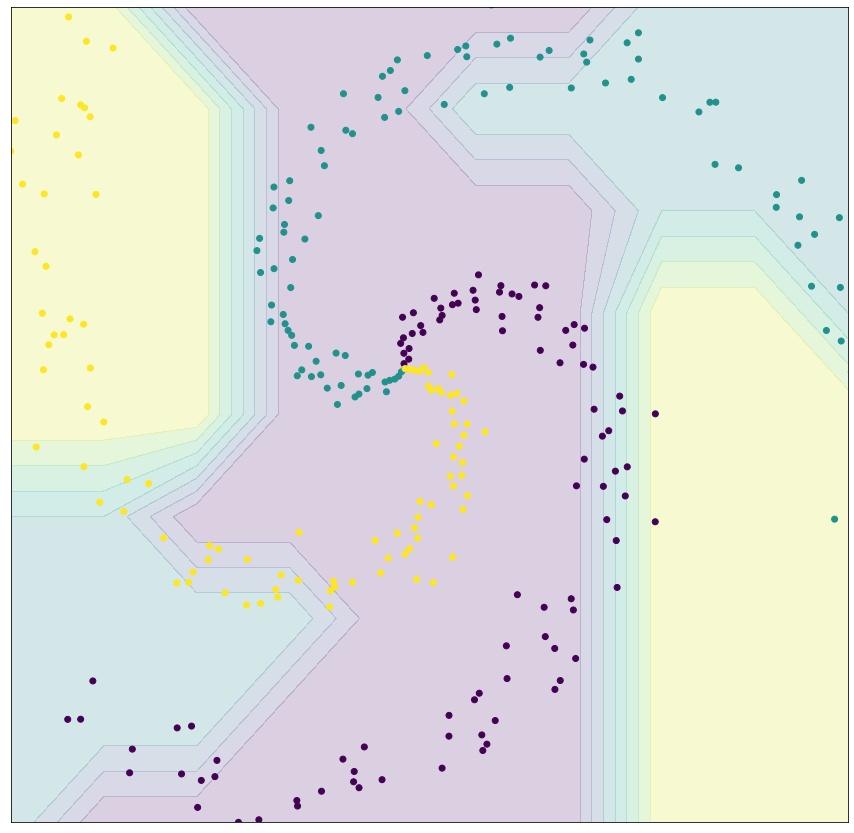

Polynomial Kernel with degree = 3


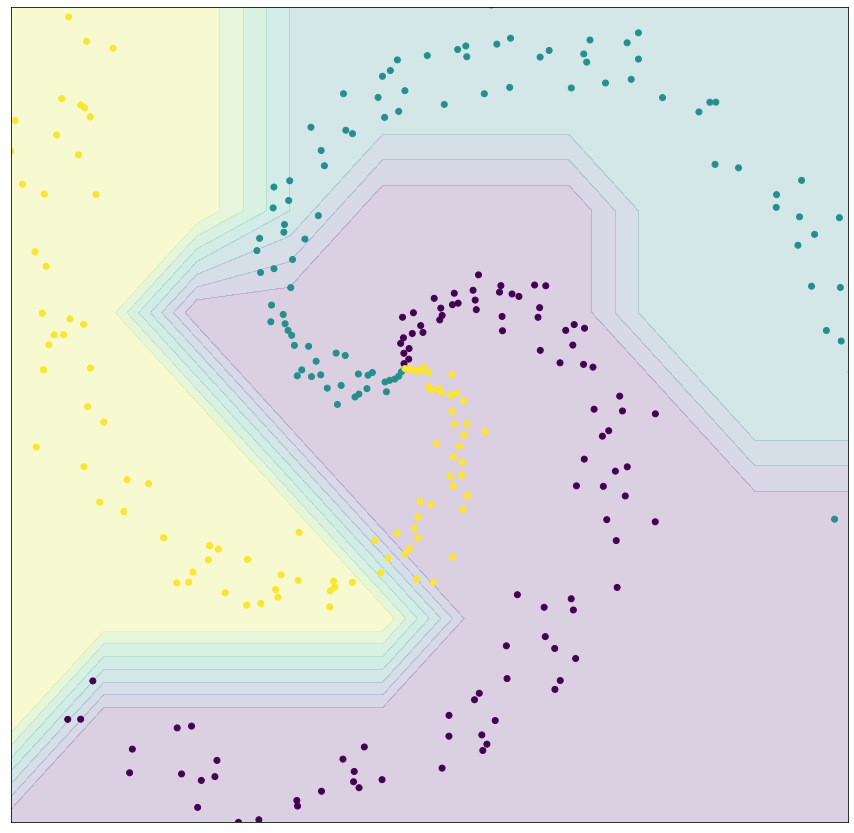

Polynomial Kernel with degree = 4


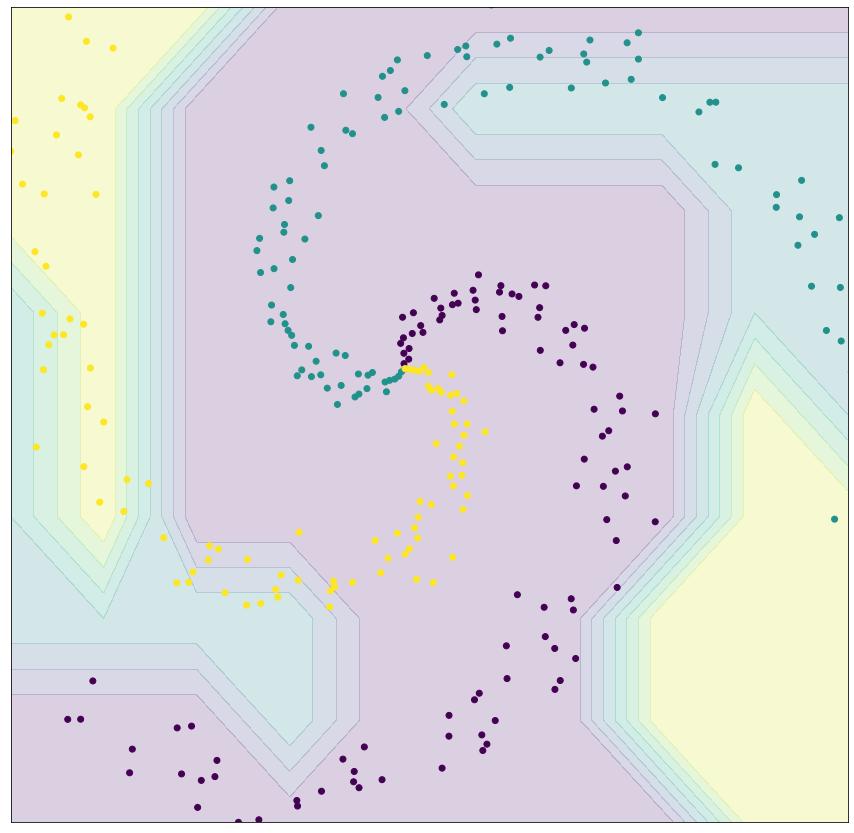

Polynomial Kernel with degree = 5


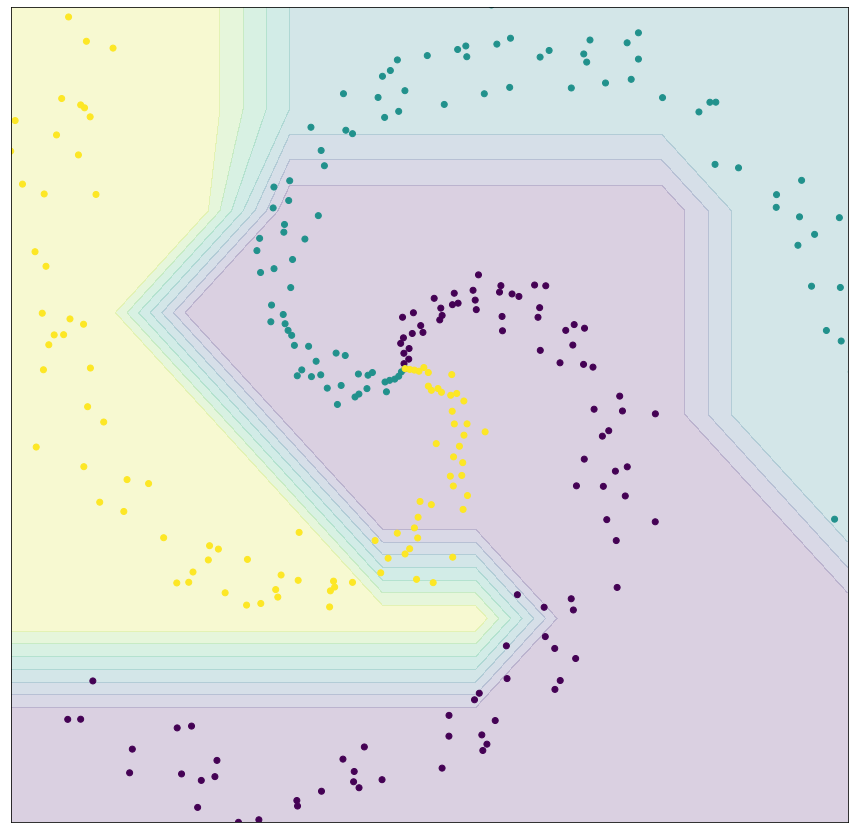

Polynomial Kernel with degree = 6


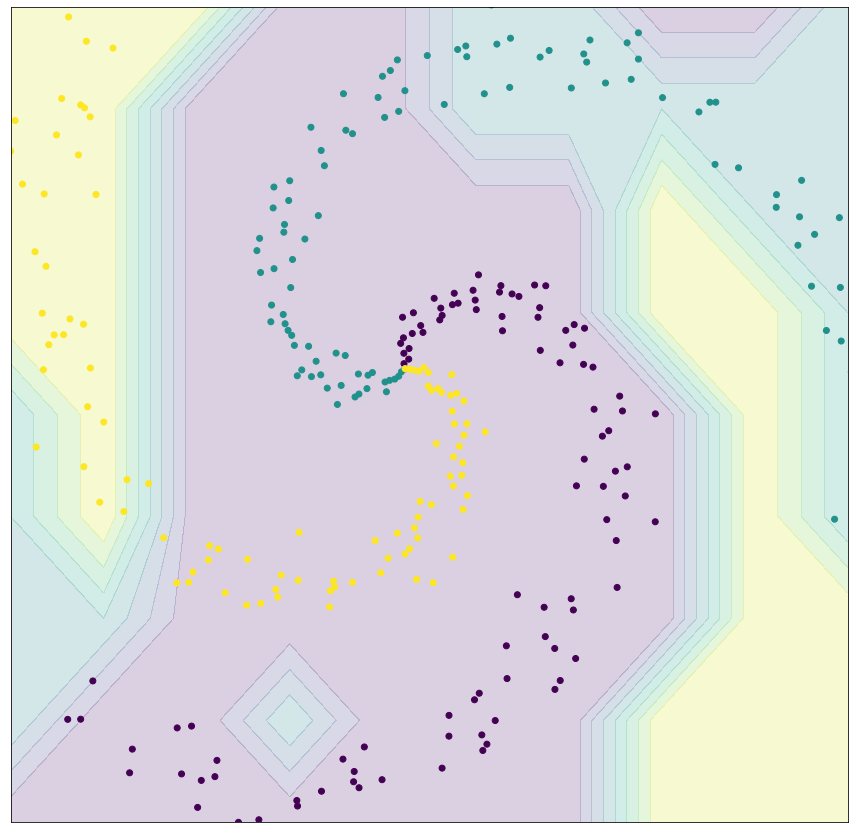

Polynomial Kernel with degree = 7


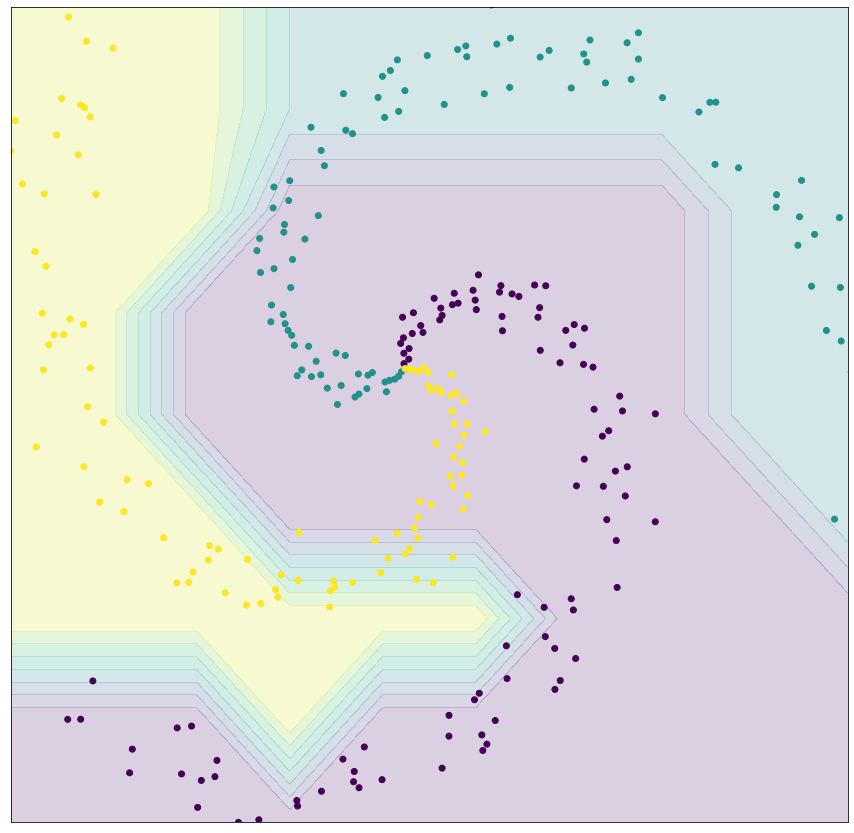

Polynomial Kernel with degree = 8


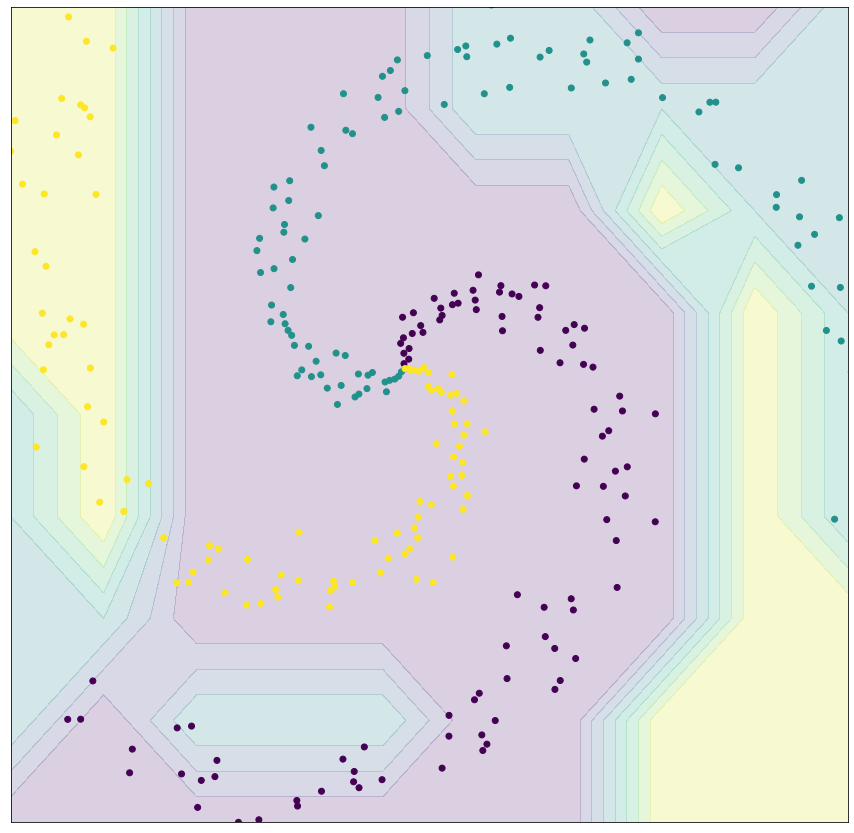

Polynomial Kernel with degree = 9


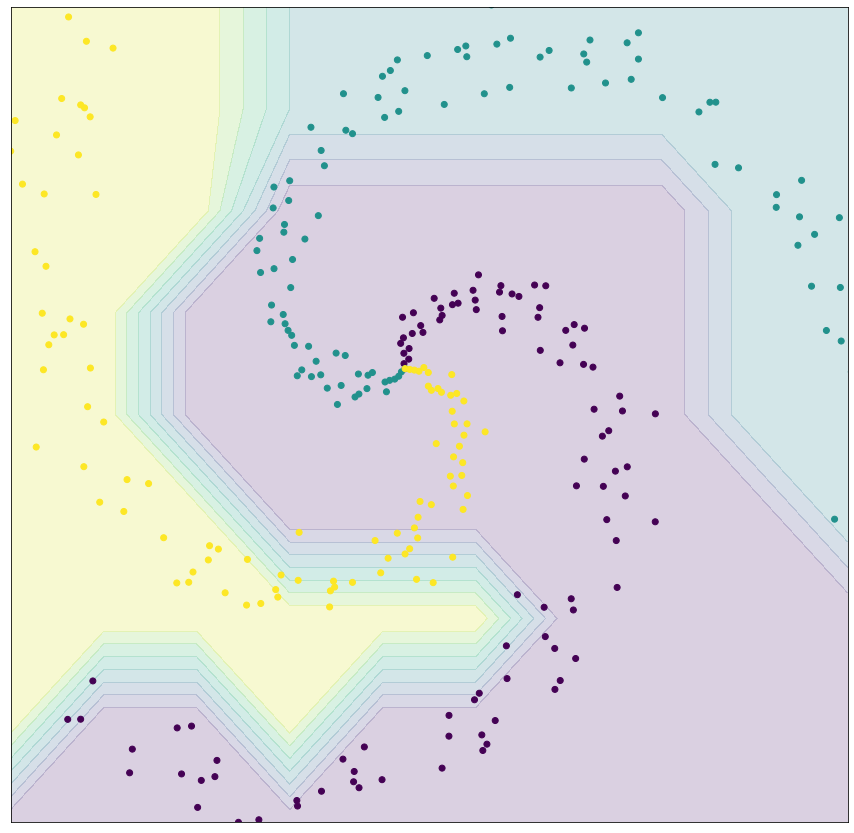

In [15]:
for i in range(1,10):
    print("Polynomial Kernel with degree = {}".format(i))
    svm_polynomial_kernel(i)


# Exercise #4: Working Example - Text Classification

We are going to apply SVM to a real scenario.
Do you remember the polarity classification task that we addressed in the Naïve Bayes Practice? Let's see if the fancier SVM model can outperform our first naïve approach.

To facilitate you the exercise, the following code prepare the the movie-pang dataset (use the same `movie-pang02.csv` provided for the Naïve Bayes practice) for the application of SVM.

In [16]:
dataset = pd.read_csv("datasets/movie-pang02.csv")

# Randomize the dataset to facilitate the training process
dataset = dataset.sample(frac=1).reset_index(drop=True)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
dataset_counts = count_vect.fit_transform(dataset.text)

X_train, X_test, y_train, y_test = train_test_split(dataset_counts, dataset['class'], test_size=0.2, random_state=42)

Train an SVM classifier, plot the confusion matrix and evaluate it in terms of accuracy.

**Note**: I recommend you to use the `rbf` kernel which is specially suited for text classification. Take a look to this kernel, its hyperparameters and their configuration: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py


Have we improved the Naive Bayes model?

SVM Accuracy = 0.815


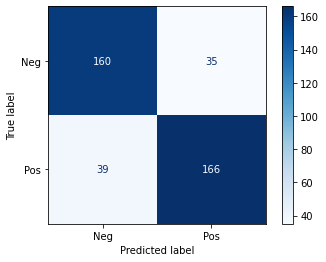

In [17]:
svm_clf = svm.SVC(C=10,kernel='rbf').fit(X_train, y_train)

print("SVM Accuracy = {}".format(accuracy_score(svm_clf.predict(X_test), y_test)))
plot_confusion_matrix(svm_clf, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

As expected, our SVM model is significantly better than the more basic NB model.


Let's try to tune SVM parameters to further improve the model performance

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C":[1,5,10,100], "gamma":[0.01,0.0001,0.00001]}

estimator = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
estimator.fit(X_train, y_train);


Plot the results (code adapted from the sklearn documentation: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py)

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (estimator.best_params_, estimator.best_score_))


scores = estimator.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Draw heatmap of the validation accuracy as a function of gamma and C

plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Validation accuracy')
plt.show()